# iNeuron Internship Project : Swiggy Data Analysis

<h2 align='center'>By : Nikhil Srivastava </h2>



<img src="https://entrackr-bucket.s3.ap-south-1.amazonaws.com/wp-content/uploads/2022/02/10123018/Swiggy-img.jpg" width="500" height="400" align="center"/>


In [270]:
# library import
import pandas as pd
import numpy as np
import random as rnd

# for data visualization 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.express as px

import warnings
warnings.filterwarnings(action = 'ignore')

In [271]:
df=pd.read_csv("https://raw.githubusercontent.com/pradeep3114/DataSets/main/Swiggy%20Bangalore%20Outlet%20Details.csv")
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200


In [272]:
df.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [274]:
df.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

# Data Pre-processing & Cleaning -

In [275]:
df['Shop_Name'].unique()

array(['Kanti Sweets', 'Mumbai Tiffin', 'Sri Krishna sagar', 'Al Daaz',
       'Beijing Bites', 'Kitchens of Punjab',
       '99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food Court',
       "La Pino'z Pizza", 'Hotel Manu', 'Yumlane Pizza',
       'Ambur Star Briyani', 'Cake Box', 'Meghana Foods', 'Momoz',
       'A2B - Adyar Ananda Bhavan', 'Shawarma Inc',
       'WarmOven Cake & Desserts', 'Sri Lakshmi Dhaba',
       'Falahaar & Kota Kachori', 'Shree Khana Khazana',
       'Just Bake - Cakes & confectioners', 'Maa Di Hatti',
       'Hotel Godavari', 'Rolls On Wheels', 'New Udupi Grand',
       'Swad Punjab da', 'Rice Bowl', 'High N Hungry', 'Burger King',
       'Nandhana Palace', 'Easy Bites', 'Bengali Fun Foods',
       'Madurai Idly Shop', 'Oottupura', 'Taco Bell',
       'Hyderabadi Biryani Hub', 'Biriyani Zone', "Gongura's",
       'Bathinda Junction', 'Leon Grill', "Venu's Donne Biryani",
       'Cakewala', 'Swadista Aahar', 'Cream Stone',
       'Svadu Pure Ghee Sweets', 'Sai Abh

In [276]:
df.Shop_Name.value_counts()

La Pino'z Pizza                     2
Leon Grill                          2
Easy Bites                          2
Kanti Sweets                        1
CRAVY WINGS - The American Diner    1
                                   ..
Hyderabadi Biryani Hub              1
Taco Bell                           1
Oottupura                           1
Madurai Idly Shop                   1
Mani's Dum Biryani                  1
Name: Shop_Name, Length: 115, dtype: int64

In [277]:
df.Rating.unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [278]:
df.dtypes


Shop_Name       object
Cuisine         object
Location        object
Rating          object
Cost_for_Two    object
dtype: object

In [279]:
df.Rating=df.Rating.str.replace('--','0').astype(float)

In [280]:
df.Rating.unique()

array([4.3, 4.4, 4.1, 4.2, 3.9, 3.8, 4. , 3.7, 3.6, 4.8, 4.5, 4.6, 0. ])

In [281]:
df.Cost_for_Two.unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [282]:
a=df.Cost_for_Two
a.unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [283]:
obj=lambda x:x[2:]
    

In [284]:
a=a.apply(obj)

a

0      150
1      400
2      126
3      400
4      450
      ... 
113    219
114    600
115    193
116    200
117    400
Name: Cost_for_Two, Length: 118, dtype: object

In [285]:
a=a.astype(int)
a

0      150
1      400
2      126
3      400
4      450
      ... 
113    219
114    600
115    193
116    200
117    400
Name: Cost_for_Two, Length: 118, dtype: int32

In [286]:
df.Cost_for_Two=a
df.Cost_for_Two

0      150
1      400
2      126
3      400
4      450
      ... 
113    219
114    600
115    193
116    200
117    400
Name: Cost_for_Two, Length: 118, dtype: int32

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost_for_Two  118 non-null    int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 4.3+ KB


In [288]:
df.describe()

,Rating,Cost_for_Two
count,118.000000,118.000000
mean,4.061864,321.008475
std,0.430845,137.286804
min,0.000000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


# Observation

1. Mean Rating for Swiggy is 4.061 which is good for Customers.

2. Average Cost for two person is approximately 321 rupees.

3. Max Rating and Cost for two is 4.8 and 800 rupees respectively.

In [289]:
#Shops that have minimum cost and maximum rating

In [290]:
df.sort_values(by='Rating', ascending=False).head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
78,Khichdi Experiment,"Home Food, Healthy Food, Indian","Koramangala, Koramangala",4.8,200
94,Corner House Ice Cream,"Ice Cream, Desserts","7th Block, Koramangala",4.6,250
82,Natural Ice Cream,Ice Cream,"Near Wipro Park Signal, Koramangala",4.6,150
80,Chinese Bae,"Chinese, Thai","BTM, BTM",4.5,450
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400


In [291]:
df.sort_values(by='Cost_for_Two').head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
79,Tandoori Merchant,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.2,100
89,99 VARIETY DOSA AND JUICE-Malli mane food court,"Fast Food, Juices, North Indian","Koramangala 1st block, Koramangala",4.1,100
95,NIC Natural Ice Creams,"Ice Cream, Desserts","Koramangla, Koramangala",4.2,120
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
21,Maa Di Hatti,"Chinese, Healthy Food, North Indian","Jakkasandra Extn, Koramangala",4.0,129


# Observation
1. Most liked food is from Khichdi Experiment which have Home Food, Healthy Food, Indian cuisines and have highest rating of 4.8

2. Ice cream business is more liked in Koramangala

3. Minimum cost for two is From shop "Maa di Hatti"

<AxesSubplot:xlabel='Shop_Name', ylabel='Cost_for_Two'>

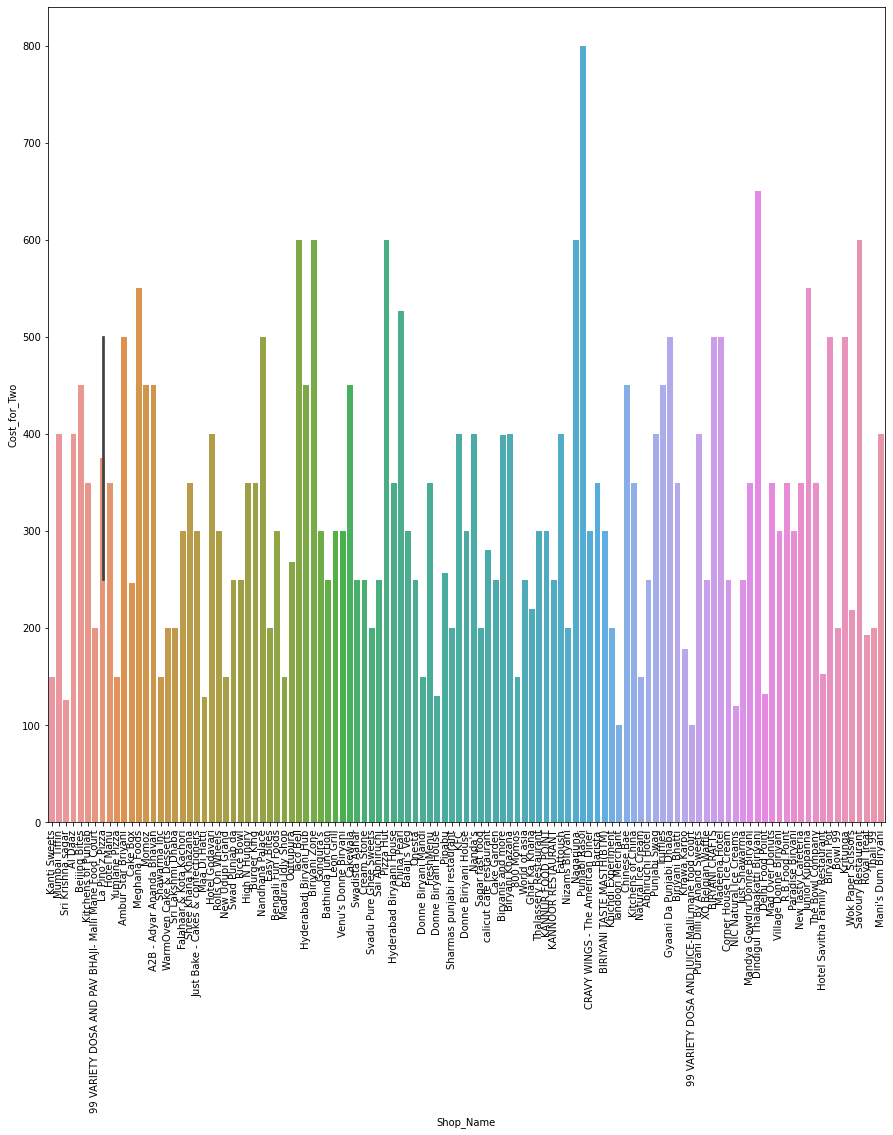

In [292]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x=df.Shop_Name,y=df.Cost_for_Two)


<AxesSubplot:xlabel='Shop_Name', ylabel='Rating'>

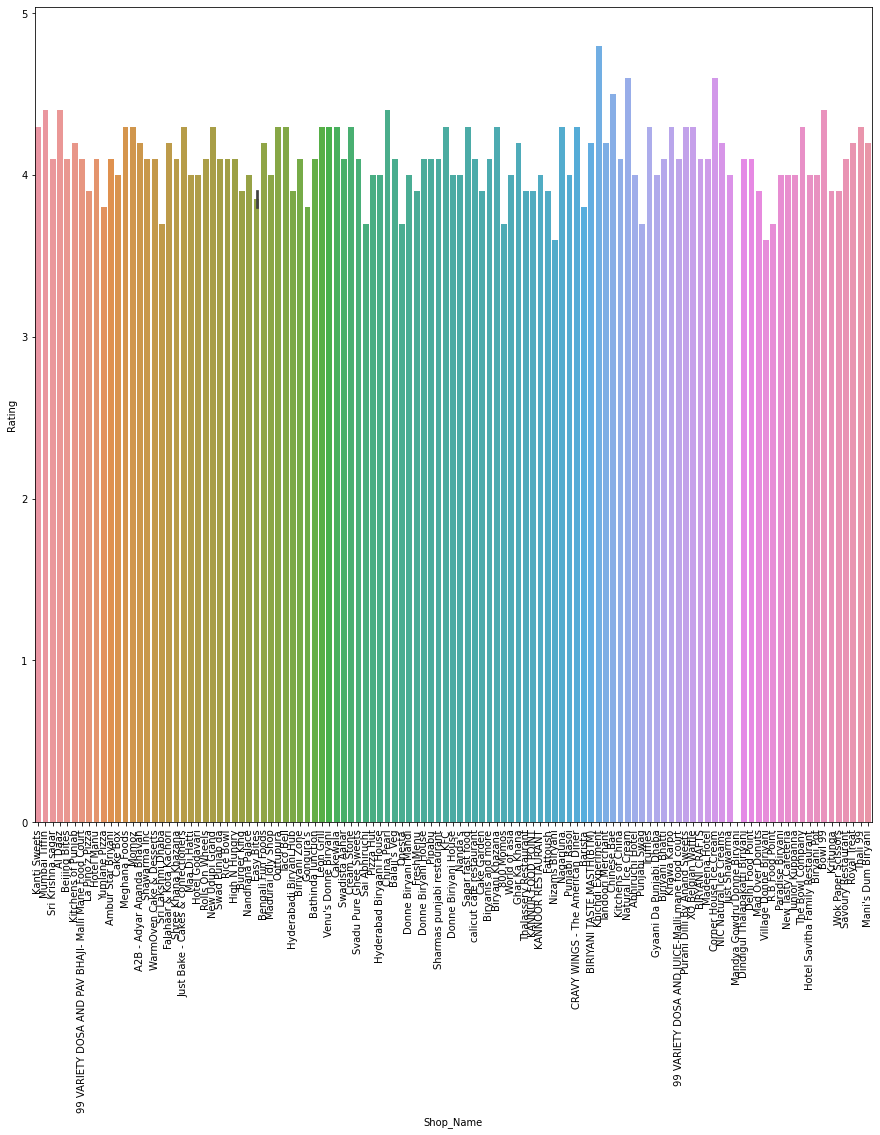

In [293]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x=df.Shop_Name,y=df.Rating)

In [294]:
df.Rating.describe()

count    118.000000
mean       4.061864
std        0.430845
min        0.000000
25%        4.000000
50%        4.100000
75%        4.300000
max        4.800000
Name: Rating, dtype: float64

In [295]:
df["Rating"].sort_values(ascending=True)

98     0.0
103    3.6
71     3.6
17     3.7
84     3.7
      ... 
1      4.4
80     4.5
94     4.6
82     4.6
78     4.8
Name: Rating, Length: 118, dtype: float64

# Area-wise Analysis

In [296]:
L=df.Location.unique()
L

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [297]:
loc=[]
def dis():
    for i in df.Location:
        loc.append(i.split(",")[-1])
    return loc
l=dis()
l

[' Koramangala',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' HSR',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' HSR',
 ' HSR',
 ' Koramangala',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' Jayanagar',
 ' Koramangala',
 ' BTM

In [298]:
a=set(l)
len(a)

4

In [299]:
a

{' BTM', ' HSR', ' Jayanagar', ' Koramangala'}

In [300]:
df["Area"]=l
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
...,...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219,Koramangala
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600,BTM
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193,Koramangala
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200,Koramangala


**Area Koramangala**

In [301]:

Koramangala = df[df['Area'] == ' Koramangala']
Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350,Koramangala
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150,Koramangala
...,...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500,Koramangala
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219,Koramangala
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193,Koramangala
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200,Koramangala


In [302]:
Koramangala.describe()

,Rating,Cost_for_Two
count,64.000000,64.000000
mean,4.126563,297.828125
std,0.217666,134.319632
min,3.600000,100.000000
25%,4.000000,200.000000
50%,4.100000,254.000000
75%,4.300000,399.250000
max,4.800000,600.000000


<AxesSubplot:xlabel='Shop_Name', ylabel='Rating'>

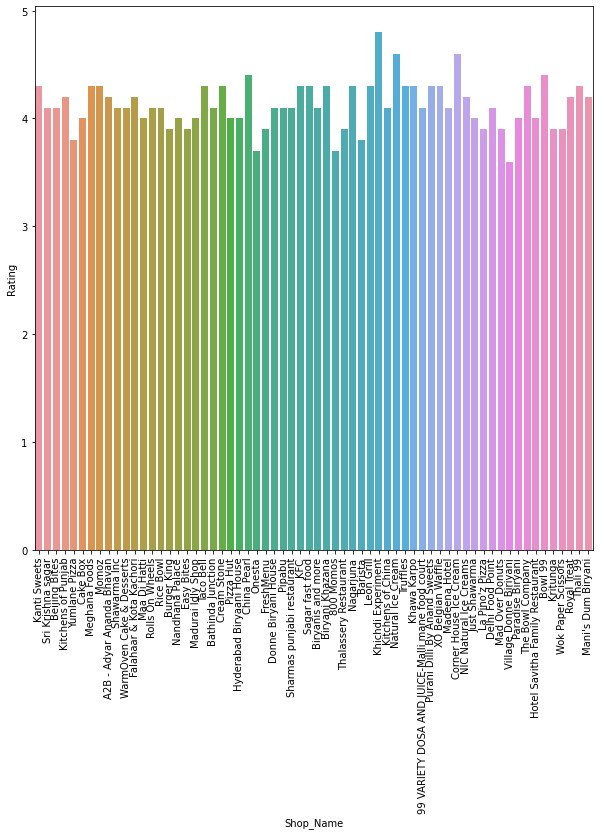

In [303]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=Koramangala['Shop_Name'],y=Koramangala.Rating)

<AxesSubplot:xlabel='Cost_for_Two', ylabel='Count'>

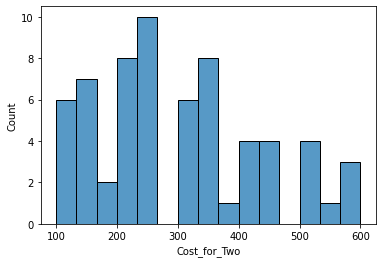

In [304]:
sns.histplot(Koramangala['Cost_for_Two'],bins=15)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

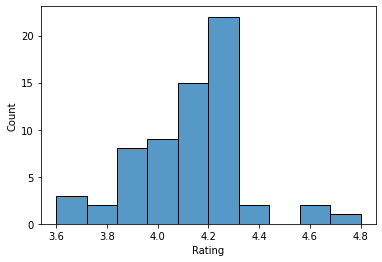

In [305]:
sns.histplot(Koramangala['Rating'],bins=10)

**Area Jayanagar**

In [306]:
Jayanagar = df[df['Area'] == ' Jayanagar']
Jayanagar

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
74,CRAVY WINGS - The American Diner,"American, Fast Food","Bannerghatta Road, Jayanagar",4.3,300,Jayanagar



**Area HSR**

In [307]:
HSR = df[df['Area'] == ' HSR']
HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350,HSR
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350,HSR
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150,HSR
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600,HSR
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300,HSR
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300,HSR
41,Cakewala,Desserts,"HSR, HSR",4.3,450,HSR
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300,HSR


In [308]:
HSR.describe()

,Rating,Cost_for_Two
count,18.000000,18.000000
mean,3.844444,388.888889
std,0.983524,169.389523
min,0.000000,150.000000
25%,3.925000,300.000000
50%,4.050000,350.000000
75%,4.250000,437.500000
max,4.400000,800.000000


<AxesSubplot:xlabel='Shop_Name', ylabel='Rating'>

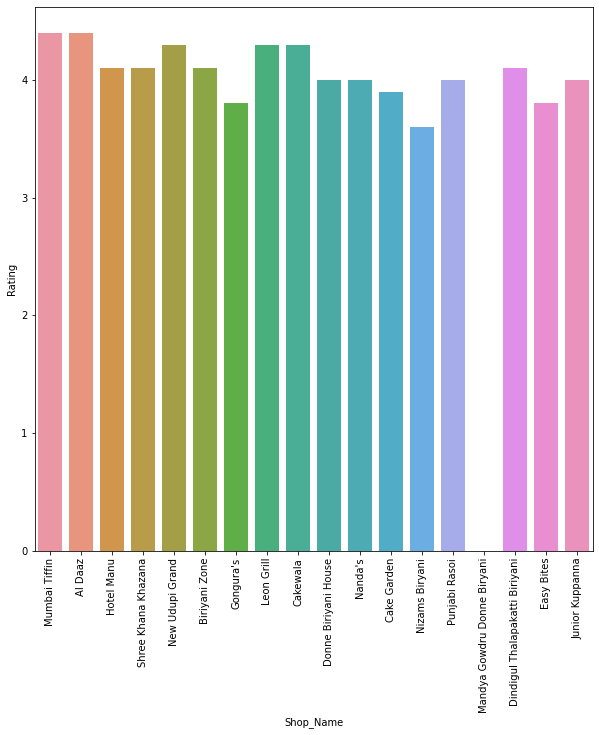

In [309]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=HSR['Shop_Name'],y=HSR.Rating)

<AxesSubplot:xlabel='Cost_for_Two', ylabel='Count'>

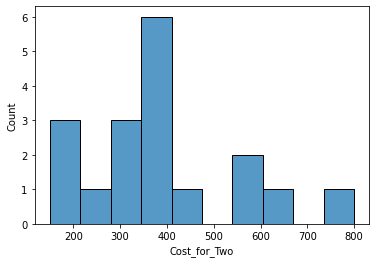

In [310]:
sns.histplot(HSR['Cost_for_Two'],bins=10)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

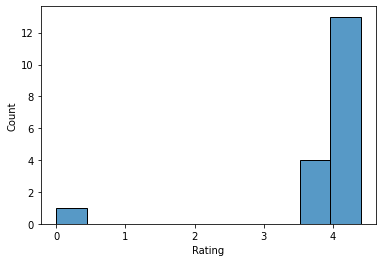

In [311]:
sns.histplot(HSR['Rating'],bins=10)

**Area BTM**

In [312]:
BTM = df[df['Area'] == ' BTM']
BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200,BTM
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500,BTM
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500,BTM
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200,BTM
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300,BTM
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400,BTM
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250,BTM
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350,BTM
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300,BTM
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268,BTM


In [313]:
HSR.describe()

,Rating,Cost_for_Two
count,18.000000,18.000000
mean,3.844444,388.888889
std,0.983524,169.389523
min,0.000000,150.000000
25%,3.925000,300.000000
50%,4.050000,350.000000
75%,4.250000,437.500000
max,4.400000,800.000000


<AxesSubplot:xlabel='Shop_Name', ylabel='Rating'>

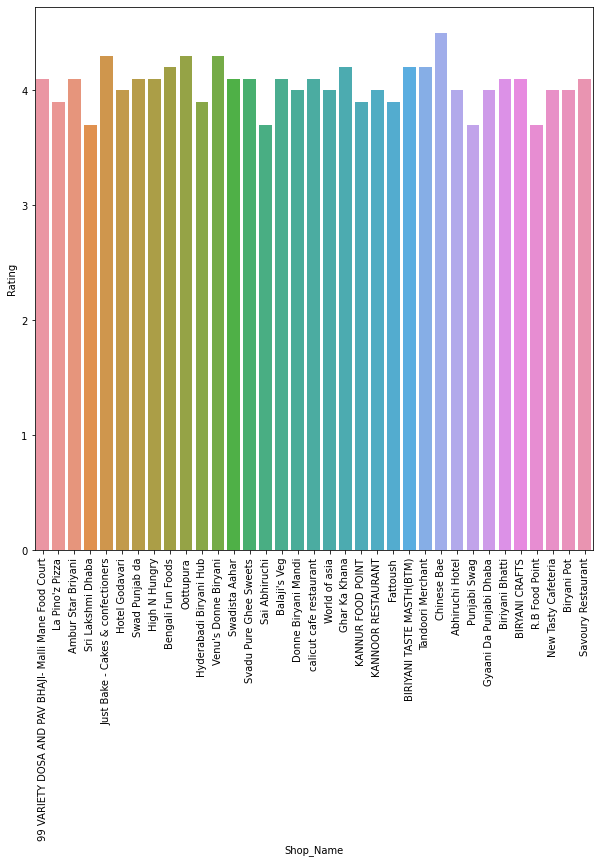

In [314]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=BTM['Shop_Name'],y=BTM.Rating)

<AxesSubplot:xlabel='Cost_for_Two', ylabel='Count'>

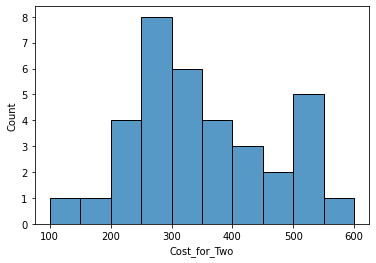

In [315]:
sns.histplot(BTM['Cost_for_Two'],bins=10)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

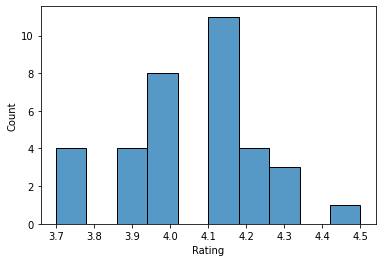

In [316]:
sns.histplot(BTM['Rating'],bins=10)

#  Conclusion: 
As we can see that the Area-wise Rating & Cost for Two varies as following:

BTM : Most has 4.0 to 4.2 Rating and Approx. Cost for Two People lies between 200 to 350. (Max. Cost goes upto 600)

HSR : Most has 4 or above Rating and Approx. Cost for Two People lies between 300 to 400. (Max. Cost goes upto 800)

Koramangala : Most has 4.0 to 4.3 Rating and Approx. Cost for Two People lies between 200 to 350. (Max. Cost goes upto 600)

With this we can conclude the Most Costly Area is HSR


# Revenue Area wise

In [317]:
Revenue={}

Revenue['BTM']=BTM['Cost_for_Two'].sum()
Revenue['HSR']=HSR['Cost_for_Two'].sum()
Revenue['Jayanagar']=Jayanagar['Cost_for_Two'].sum()
Revenue['Koramangala']=Koramangala['Cost_for_Two'].sum()

Re=Revenue.values()
city=Revenue.keys()
    
Revenue=pd.DataFrame()
Revenue['Revenue'] = Re
Revenue['City'] = city
Revenue

,Revenue,City
0,11518,BTM
1,7000,HSR
2,300,Jayanagar
3,19061,Koramangala


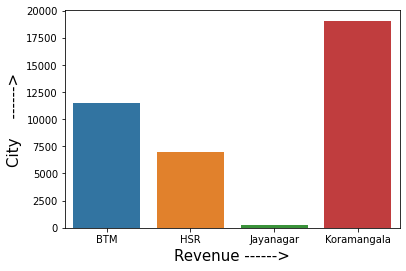

In [318]:
sns.barplot(x=Revenue['City'], y=Revenue['Revenue'],data=Revenue)
plt.xlabel('Revenue ------>',fontsize=15)
plt.ylabel('City    ------>',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Number of shop In Area')

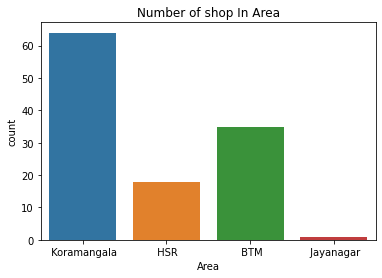

In [319]:
sns.countplot(df.Area)
plt.title("Number of shop In Area")

# Conclusion: 

Maximum Revenue is from Koramangala and Maximum number of shops are from Koramangala



# CUISINE ANALYSIS:

In [320]:
df.Cuisine

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [321]:
w=df.Cuisine.unique()
w

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [322]:
cu=[]
for i in w:
    e=i.split(",")
    for j in e:
        if j[0]==" ":
            j=j[1:]
        if j not in cu:
            cu.append(j)

cu

['Sweets',
 'North Indian',
 'Home Food',
 'Thalis',
 'Combo',
 'South Indian',
 'Fast Food',
 'Beverages',
 'Jain',
 'American',
 'Arabian',
 'Chinese',
 'Desserts',
 'Mughlai',
 'Thai',
 'Italian',
 'Kerala',
 'Pizzas',
 'Mexican',
 'Andhra',
 'Seafood',
 'Biryani',
 'Indian',
 'Rajasthani',
 'Bakery',
 'Healthy Food',
 'Hyderabadi',
 'Snacks',
 'Turkish',
 'Portuguese',
 'Chaat',
 'Asian',
 'Continental',
 'Mediterranean',
 'Lebanese',
 'Cafe',
 'Salads',
 'Pastas',
 'Punjabi',
 'Juices',
 'Kebabs',
 'Grill',
 'Ice Cream',
 'Tandoor',
 'Chettinad',
 'Pan-Asian',
 'Oriental',
 'Middle Eastern']

In [323]:
dict_Cuisine = {}
for i in  df['Cuisine'].unique():
    Cuisines_Lists = i.split(',')
    for Cuisine in Cuisines_Lists:
        Cuisine =Cuisine.lstrip(" ")
        if Cuisine in dict_Cuisine:
            dict_Cuisine[Cuisine] = dict_Cuisine[Cuisine] + 1
        else: 
            dict_Cuisine[Cuisine] = 1
        
print(dict_Cuisine)
print()
print('Total Records: \t', len( dict_Cuisine))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total Records: 	 48


In [324]:
Cuisine = dict_Cuisine.keys()
freq = dict_Cuisine.values()

In [325]:
df_Cuisine_Analysis = pd.DataFrame()

In [326]:
df_Cuisine_Analysis['Cuisine'] = Cuisine
df_Cuisine_Analysis['Count'] = freq

In [327]:
df_Cuisine_Analysis

,Cuisine,Count
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


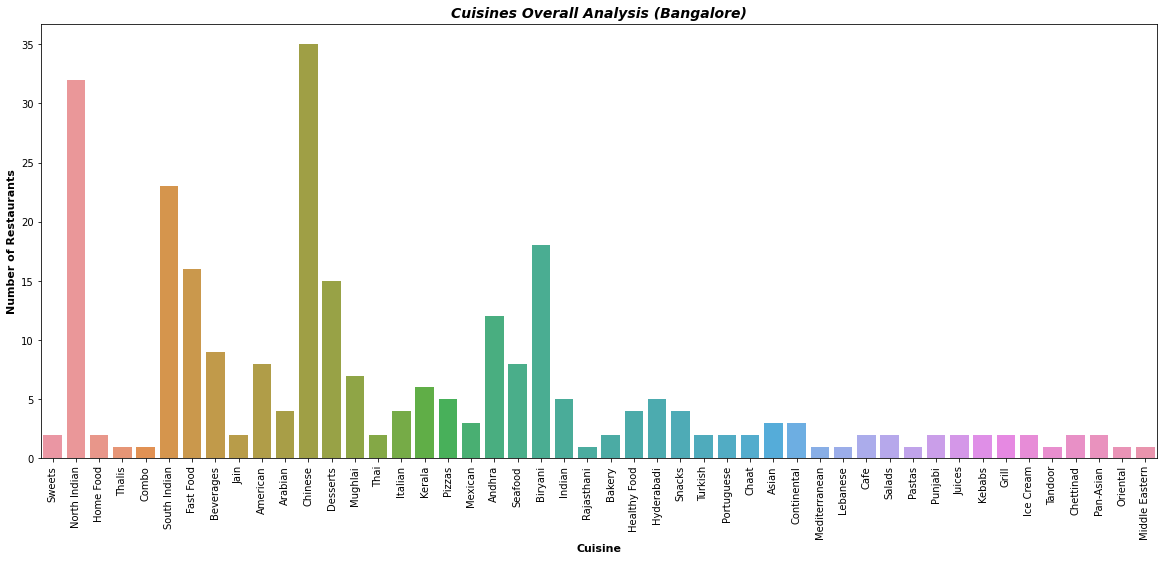

In [328]:
plt.figure(figsize = (20, 8))
sns.barplot(x = df_Cuisine_Analysis['Cuisine'], 
            y = df_Cuisine_Analysis['Count'], 
            data = df_Cuisine_Analysis)
plt.xticks(rotation = 90)
plt.title('Cuisines Overall Analysis (Bangalore)', fontsize = 14, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Cuisine', fontsize = 11, fontweight = 'bold')
plt.ylabel('Number of Restaurants', fontsize = 11, fontweight = 'bold')
plt.show()

In [329]:
df_Cuisine_sort=df_Cuisine_Analysis.sort_values(by='Count',ascending=False).head(10)
df_Cuisine_sort

,Cuisine,Count
11,Chinese,35
1,North Indian,32
5,South Indian,23
21,Biryani,18
6,Fast Food,16
12,Desserts,15
19,Andhra,12
7,Beverages,9
9,American,8
20,Seafood,8


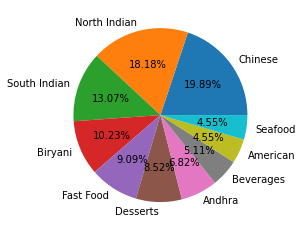

In [330]:
plt.pie(df_Cuisine_sort['Count'],labels=df_Cuisine_sort['Cuisine'],autopct='%.2f%%')
plt.show()

# Conclusion:
1. From the above Visualizations, We can say, Most of the Resturants sell "Chinese" which is around '19.89' followed by "North Indian" & "South Indian" Cuisines which are around '18.18' & '13.07'.
3. We can also infer that Most of the people are fond of these Cusines.

# Cuisines :Area-wise Analysis:

**BTM Area**

In [331]:
BTM_cuisine=BTM["Cuisine"]
BTM_cuisine


6                       Fast Food, North Indian, Chinese
7                                                Italian
10     Chinese, South Indian, North Indian, Desserts,...
17                                          North Indian
20                                      Desserts, Bakery
22                     North Indian, Chinese, Hyderabadi
25                                                Indian
27     Andhra, Biryani, Chinese, Desserts, Fast Food,...
31                                          North Indian
33                                  Kerala, South Indian
35                        North Indian, Chinese, Biryani
40                                               Biryani
42           South Indian, Snacks, North Indian, Chinese
44                    Desserts, Fast Food, Sweets, Chaat
45             Chinese, South Indian, Andhra, Hyderabadi
49                   North Indian, Chinese, South Indian
51                         Biryani, Andhra, South Indian
60                             

In [332]:
BTM_dict={}
for i in BTM_cuisine:
    k=i.split(",")
    for j in k:
        j = j.lstrip(' ')
        if j in BTM_dict:
            BTM_dict[j]=BTM_dict[j]+1
        else:
            BTM_dict[j]=1
            
print(BTM_dict)
print()
print('Total Records of BTM: \t', len(BTM_dict))   

{'Fast Food': 7, 'North Indian': 19, 'Chinese': 19, 'Italian': 1, 'South Indian': 11, 'Desserts': 7, 'Kerala': 4, 'Andhra': 8, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 4, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 3, 'Biryani': 9, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

Total Records of BTM: 	 26


In [333]:
Cuisine_BTM = BTM_dict.keys()
freq_BTM = BTM_dict.values()
dict_BTM = {
    'Cuisine' : Cuisine_BTM,
    'Count' : freq_BTM
}

BTM_Cuisine= pd.DataFrame(dict_BTM)
BTM_Cuisine

,Cuisine,Count
0,Fast Food,7
1,North Indian,19
2,Chinese,19
3,Italian,1
4,South Indian,11
5,Desserts,7
6,Kerala,4
7,Andhra,8
8,Beverages,4
9,Mughlai,3


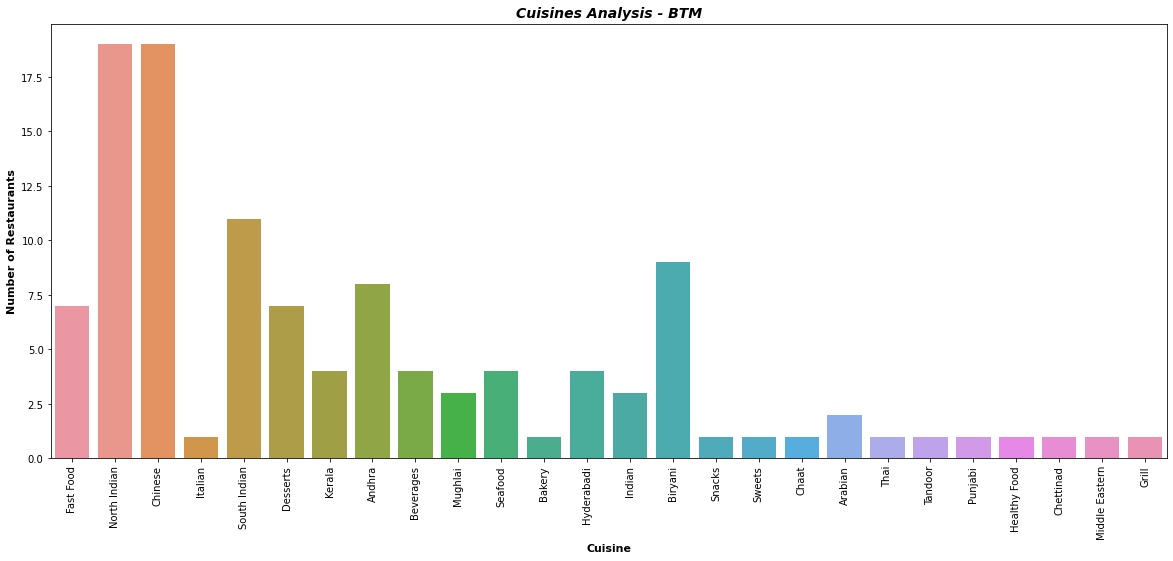

In [334]:
plt.figure(figsize = (20, 8))
sns.barplot(x = BTM_Cuisine['Cuisine'], 
            y = BTM_Cuisine['Count'], 
            data = BTM_Cuisine)

plt.xticks(rotation = 90)

plt.title('Cuisines Analysis - BTM', fontsize = 14, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Cuisine', fontsize = 11, fontweight = 'bold')
plt.ylabel('Number of Restaurants', fontsize = 11, fontweight = 'bold')

plt.show()

In [335]:
cu_BTM=BTM_Cuisine.sort_values(by="Count",ascending=False)

cu_BTM

,Cuisine,Count
2,Chinese,19
1,North Indian,19
4,South Indian,11
14,Biryani,9
7,Andhra,8
0,Fast Food,7
5,Desserts,7
12,Hyderabadi,4
6,Kerala,4
8,Beverages,4


In [336]:
fig = px.pie(data_frame = cu_BTM, 
             names = cu_BTM['Cuisine'], 
             values = cu_BTM['Count'], 
             title = 'Distribution of Cuisines in Area BTM Restaurants')

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()


# Conclusion:

From the above Visualizations, We can say, In BTM Area, Most of the Resturants sell "Chinese" which is around '16.4%' followed by "North Indian" & "South Indian" Cuisines which are around '16.4%' & '9.48%'.


So, We can also infer that Most of the people are fond of these Cusines. 

**Area HSR**

In [337]:
HSR_cuisine=HSR["Cuisine"]
HSR_cuisine

1                 North Indian, Home Food, Thalis, Combo
3      American, Arabian, Chinese, Desserts, Fast Foo...
8            South Indian, Kerala, Chinese, North Indian
19                                    Indian, Rajasthani
24             Chinese, Jain, North Indian, South Indian
36                        North Indian, Chinese, Biryani
37                        North Indian, Chinese, Biryani
39                         Turkish, Portuguese, American
41                                              Desserts
57                                          South Indian
58                                       Andhra, Biryani
61                                      Desserts, Bakery
71                               Biryani, Juices, Kebabs
73                                          North Indian
98                                               Biryani
99                                          North Indian
101                                     Snacks, American
107                            

In [338]:
HSR_dict={}
for i in HSR_cuisine:
    k=i.split(",")
    for j in k:
        j = j.lstrip(' ')
        if j in HSR_dict:
            HSR_dict[j]=HSR_dict[j]+1
        else:
            HSR_dict[j]=1
            
print(HSR_dict)
print()
print('Total Records of HSR: \t', len(HSR_dict))   

{'North Indian': 8, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 5, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 5, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}

Total Records of HSR: 	 24


In [339]:
Cuisine_HSR = HSR_dict.keys()
freq_HSR= HSR_dict.values()
dict_HSR = {
    'Cuisine' : Cuisine_HSR,
    'Count' : freq_HSR
}

HSR_Cuisine= pd.DataFrame(dict_HSR)
HSR_Cuisine

,Cuisine,Count
0,North Indian,8
1,Home Food,1
2,Thalis,1
3,Combo,1
4,American,3
5,Arabian,1
6,Chinese,5
7,Desserts,3
8,Fast Food,1
9,Mughlai,1


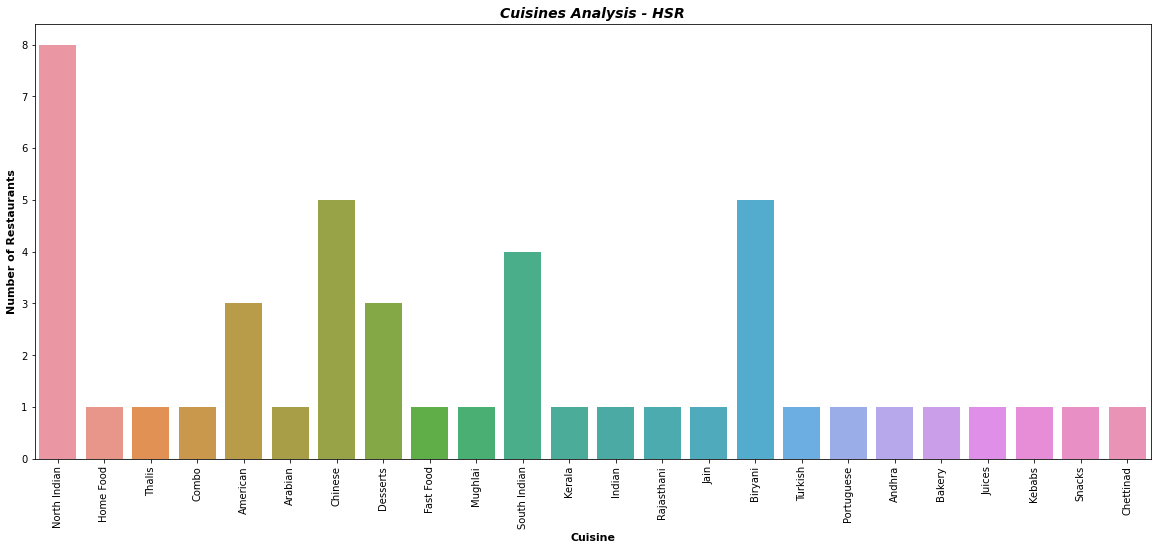

In [340]:
plt.figure(figsize = (20, 8))
sns.barplot(x = HSR_Cuisine['Cuisine'], 
            y = HSR_Cuisine['Count'], 
            data = HSR_Cuisine)

plt.xticks(rotation = 90)

plt.title('Cuisines Analysis - HSR', fontsize = 14, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Cuisine', fontsize = 11, fontweight = 'bold')
plt.ylabel('Number of Restaurants', fontsize = 11, fontweight = 'bold')

plt.show()

In [341]:
cu_HSR=HSR_Cuisine.sort_values(by="Count",ascending=False)

cu_HSR

,Cuisine,Count
0,North Indian,8
6,Chinese,5
15,Biryani,5
10,South Indian,4
4,American,3
7,Desserts,3
14,Jain,1
22,Snacks,1
21,Kebabs,1
20,Juices,1


In [342]:
fig = px.pie(data_frame = cu_HSR, 
             names = cu_HSR['Cuisine'], 
             values = cu_HSR['Count'], 
             title = 'Distribution of Cuisines in Area HSR Restaurants')

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()

# Conclusion:

We can say, In HSR Area, "North Indian" Cuisines are dominated by around '17.4%' followed by "Chinese" & "South Indian" Cuisines '10.9%' & '8.7%' Restaurants respectively.

In HSR Area, We may have more "North Indian" people staying there.

**Koramangala Area**

In [343]:
Koramangala_cuisine=Koramangala["Cuisine"]
Koramangala_cuisine

0                                                 Sweets
2      South Indian, North Indian, Fast Food, Beverag...
4                                          Chinese, Thai
5                                           North Indian
9                               Pizzas, Italian, Mexican
                             ...                        
112                                      Andhra, Biryani
113                            Pan-Asian, Chinese, Asian
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 64, dtype: object

In [344]:
Koramangala_dict={}
for i in Koramangala_cuisine:
    k=i.split(",")
    for j in k:
        j = j.lstrip(' ')
        if j in Koramangala_dict:
            Koramangala_dict[j]=Koramangala_dict[j]+1
        else:
            Koramangala_dict[j]=1
            
print(Koramangala_dict)
print()
print('Total Records of HSR: \t', len(Koramangala_dict))   

{'Sweets': 1, 'South Indian': 13, 'North Indian': 20, 'Fast Food': 11, 'Beverages': 5, 'Jain': 1, 'Chinese': 18, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 12, 'Andhra': 6, 'Biryani': 12, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 7, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 3, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

Total Records of HSR: 	 42


In [345]:
Cuisine_Koramangala = Koramangala_dict.keys()
freq_Koramangala= Koramangala_dict.values()
dict_Koramangala = {
    'Cuisine' : Cuisine_Koramangala,
    'Count' : freq_Koramangala
}

Koramangala_Cuisine= pd.DataFrame(dict_Koramangala)
Koramangala_Cuisine

,Cuisine,Count
0,Sweets,1
1,South Indian,13
2,North Indian,20
3,Fast Food,11
4,Beverages,5
5,Jain,1
6,Chinese,18
7,Thai,2
8,Pizzas,5
9,Italian,4


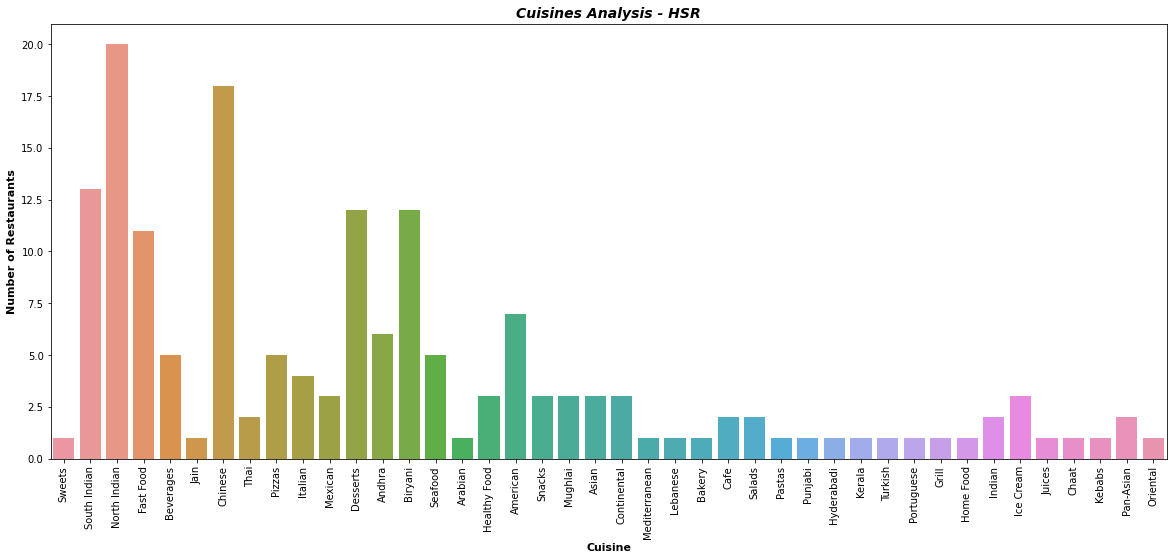

In [346]:
plt.figure(figsize = (20, 8))
sns.barplot(x = Koramangala_Cuisine['Cuisine'], 
            y = Koramangala_Cuisine['Count'], 
            data =Koramangala_Cuisine)

plt.xticks(rotation = 90)

plt.title('Cuisines Analysis - HSR', fontsize = 14, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Cuisine', fontsize = 11, fontweight = 'bold')
plt.ylabel('Number of Restaurants', fontsize = 11, fontweight = 'bold')

plt.show()

In [347]:
cu_Koramangala=Koramangala_Cuisine.sort_values(by="Count",ascending=False)

cu_Koramangala

,Cuisine,Count
2,North Indian,20
6,Chinese,18
1,South Indian,13
13,Biryani,12
11,Desserts,12
3,Fast Food,11
17,American,7
12,Andhra,6
4,Beverages,5
8,Pizzas,5


In [348]:
fig = px.pie(data_frame = cu_HSR, 
             names = cu_Koramangala['Cuisine'], 
             values = cu_Koramangala['Count'], 
             title = 'Distribution of Cuisines in Area Koramangala Restaurants')

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()

# Conclusion:

We can say, In Koramangala Area, "North Indian" Cuisines are dominated by around '12%' followed by "Chinese" Cuisine is 10.8% & "South Indian" Cuisine 
is 7.78%

So, We can also infer that Most of the people are fond of the "North Indian" Cuisine

# WordCloud Representation for Cuisines:¶

In [349]:
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
...,...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219,Koramangala
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600,BTM
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193,Koramangala
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200,Koramangala


In [350]:
df['Cuisine']

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [351]:
df_Swiggy_Text = ', '.join(df['Cuisine'])
df_Swiggy_Text

'Sweets, North Indian, Home Food, Thalis, Combo, South Indian, North Indian, Fast Food, Beverages, Jain, American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian, Chinese, Thai, North Indian, Fast Food, North Indian, Chinese, Italian, South Indian, Kerala, Chinese, North Indian, Pizzas, Italian, Mexican, Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood, Desserts, Chinese, Andhra, Biryani, Seafood, Chinese, South Indian, Chinese, Desserts, North Indian, Arabian, Fast Food, Desserts, Beverages, North Indian, North Indian, Indian, Rajasthani, Desserts, Bakery, Chinese, Healthy Food, North Indian, North Indian, Chinese, Hyderabadi, Fast Food, Chinese, Jain, North Indian, South Indian, Indian, North Indian, South Indian, Chinese, Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South Indian, American, Fast Food, Biryani, Seafood, North Indian, Chinese, Desserts, Andhra, South Indian, Snacks, American, North Indian, So

In [352]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [353]:
from wordcloud import WordCloud

In [354]:
import nltk
nltk.download ('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: HTTP Error 503: Backend is
[nltk_data]     unhealthy


In [355]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [356]:
stopwords_ENG = set(stopwords.words('english'))
stopwords_ENG

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

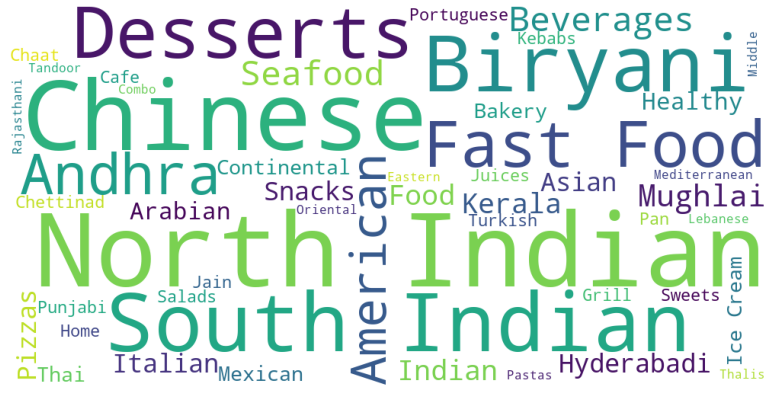

In [357]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords_ENG, background_color = 'white').generate(df_Swiggy_Text)
plt.figure(figsize = (22, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [358]:
# Save the Image in the 'img' Folder:
wordcloud.to_file(r"C:\Users\Nikhil\Desktop\Analysing Swiggy\Cuisines.png")